##### The china agricultural and economic database is a collection of agricultural-related data from official statistical publications of the people's Republic of china. Here,Develop a model to predict production of products based on other features such as category,geography_desc,unit_desc.

In [1]:
import pandas as pd

# Load the .xls file
file_path = "C:\\Users\\AP\\Downloads\\provincialdata.xls"  # Replace with the path to your .xls file
data = pd.read_excel(file_path)

# Save the data as a .csv file
data.to_csv('provincialdata.csv', index=False)  # The output CSV file will be saved in the same directory


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew,kurtosis
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
data

,Geography_Desc,Year_Desc,Category,Commodity_Desc,Amount,Unit_Desc
0,Anhui,2007,Apple production,apples,403.600000,1000 tons
1,Anhui,2007,Aquatic product production,Aquatic products,166.500000,"10,000 tons"
2,Anhui,2007,Cattle & buffalo inventory,Cattle & buffalo,143.000000,"10,000 head"
3,Anhui,2007,Corn production,corn,2500.000000,1000 tons
4,Anhui,2007,Corn sown area,corn,710.400000,1000 hectares
...,...,...,...,...,...,...
25698,Zhejiang,1965,Grain sown area,total grain,2976.000000,1000 hectares
25699,Zhejiang,1964,Grain production,total grain,8705.000000,1000 tons
25700,Zhejiang,1964,Grain sown area,total grain,3012.600000,1000 hectares
25701,Zhejiang,1963,Grain production,total grain,8170.000000,1000 tons


In [4]:
data.shape

(25703, 6)

In [5]:
data.size

154218

In [6]:
data.head()

,Geography_Desc,Year_Desc,Category,Commodity_Desc,Amount,Unit_Desc
0,Anhui,2007,Apple production,apples,403.6,1000 tons
1,Anhui,2007,Aquatic product production,Aquatic products,166.5,"10,000 tons"
2,Anhui,2007,Cattle & buffalo inventory,Cattle & buffalo,143.0,"10,000 head"
3,Anhui,2007,Corn production,corn,2500.0,1000 tons
4,Anhui,2007,Corn sown area,corn,710.4,1000 hectares


In [7]:
data.tail()

,Geography_Desc,Year_Desc,Category,Commodity_Desc,Amount,Unit_Desc
25698,Zhejiang,1965,Grain sown area,total grain,2976.000000,1000 hectares
25699,Zhejiang,1964,Grain production,total grain,8705.000000,1000 tons
25700,Zhejiang,1964,Grain sown area,total grain,3012.600000,1000 hectares
25701,Zhejiang,1963,Grain production,total grain,8170.000000,1000 tons
25702,Zhejiang,1963,Grain sown area,total grain,3045.333333,1000 hectares


In [8]:
data.columns

Index(['Geography_Desc', 'Year_Desc', 'Category', 'Commodity_Desc', 'Amount',
       'Unit_Desc'],
      dtype='object')

In [9]:
data.describe()

,Year_Desc,Amount
count,25703.000000,25703.000000
mean,1994.170486,4053.012359
std,9.536412,10145.180669
min,1963.000000,0.000000
25%,1987.000000,100.000000
50%,1996.000000,494.000000
75%,2002.000000,2921.450000
max,2007.000000,181000.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25703 entries, 0 to 25702
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Geography_Desc  25703 non-null  object 
 1   Year_Desc       25703 non-null  int64  
 2   Category        25703 non-null  object 
 3   Commodity_Desc  25703 non-null  object 
 4   Amount          25703 non-null  float64
 5   Unit_Desc       25703 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


In [11]:
print(data.isnull().sum())

Geography_Desc    0
Year_Desc         0
Category          0
Commodity_Desc    0
Amount            0
Unit_Desc         0
dtype: int64


### There is no missing values found

In [12]:
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
print("Numerical columns:", numerical_cols)

Numerical columns: Index(['Year_Desc', 'Amount'], dtype='object')


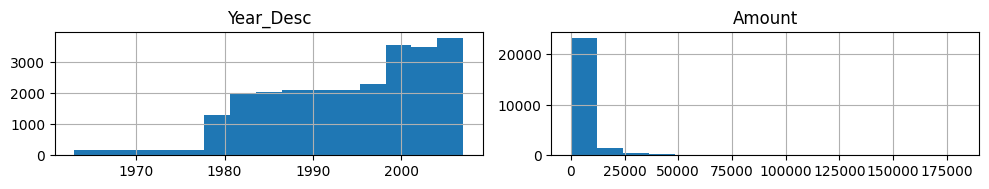

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
data[numerical_cols].hist(bins=15,figsize=(10,5),layout=(3,2))
plt.tight_layout()
plt.show()


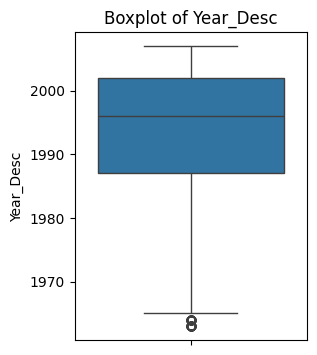

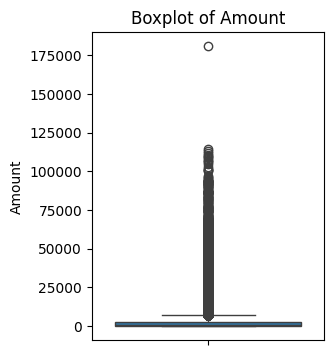

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Loop through each column and plot a boxplot if it's numeric
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(3, 4))
    sns.boxplot(y=data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()


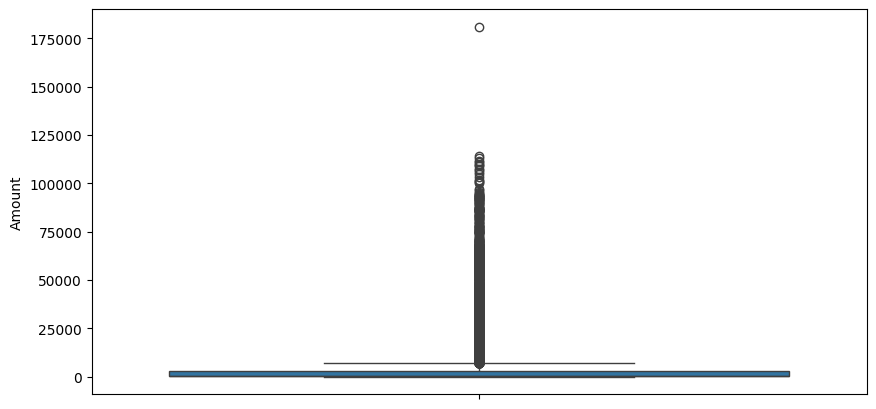

In [15]:
plt.figure(figsize=(10,5))
sns.boxplot(data['Amount'])
plt.show()

In [16]:
print(data['Amount'].mean())
print(data['Amount'].std())

4053.0123590193675
10145.180669194968


#### z-score method

In [4]:
data['z_score']=(data['Amount']-data['Amount'].mean())/data['Amount'].std()
print(data.head())

  Geography_Desc  Year_Desc                    Category    Commodity_Desc  \
0          Anhui       2007            Apple production            apples   
1          Anhui       2007  Aquatic product production  Aquatic products   
2          Anhui       2007  Cattle & buffalo inventory  Cattle & buffalo   
3          Anhui       2007             Corn production              corn   
4          Anhui       2007              Corn sown area              corn   

   Amount      Unit_Desc   z_score  
0   403.6      1000 tons -0.359719  
1   166.5    10,000 tons -0.383090  
2   143.0    10,000 head -0.385406  
3  2500.0      1000 tons -0.153079  
4   710.4  1000 hectares -0.329478  


In [5]:
#data with outliers
print(data.loc[(data['z_score']>3)|(data['z_score']<-3)])

      Geography_Desc  Year_Desc          Category    Commodity_Desc   Amount  \
26             Anhui       2007  Rural population  rural population  37503.3   
31             Anhui       2007  Total population  total population  61180.0   
71             Anhui       2006  Total population  total population  61100.0   
113            Anhui       2005  Total population  total population  61200.0   
154            Anhui       2004  Total population  total population  64610.0   
...              ...        ...               ...               ...      ...   
25497       Zhejiang       1986  Total population  total population  40701.0   
25522       Zhejiang       1985  Total population  total population  40300.0   
25547       Zhejiang       1984  Total population  total population  39930.0   
25572       Zhejiang       1983  Total population  total population  39631.0   
25597       Zhejiang       1982  Total population  total population  39240.0   

       Unit_Desc   z_score  
26        

In [6]:
#data without outliers
new_data=data[(data['z_score']>-3)&(data['z_score']<3)]
print(new_data)

      Geography_Desc  Year_Desc                    Category    Commodity_Desc  \
0              Anhui       2007            Apple production            apples   
1              Anhui       2007  Aquatic product production  Aquatic products   
2              Anhui       2007  Cattle & buffalo inventory  Cattle & buffalo   
3              Anhui       2007             Corn production              corn   
4              Anhui       2007              Corn sown area              corn   
...              ...        ...                         ...               ...   
25698       Zhejiang       1965             Grain sown area       total grain   
25699       Zhejiang       1964            Grain production       total grain   
25700       Zhejiang       1964             Grain sown area       total grain   
25701       Zhejiang       1963            Grain production       total grain   
25702       Zhejiang       1963             Grain sown area       total grain   

            Amount      Uni

In [7]:
#capping used to remove the outliers
new_data=data.copy()
upper_limit=data['Amount'].mean()+3*data['Amount'].std()
lower_limit=data['Amount'].mean()-3*data['Amount'].std()
print("upper_limit is",upper_limit)
print("lower_limit is",lower_limit)
new_data.loc[(new_data['Amount']>upper_limit,'Amount')]=upper_limit
new_data.loc[(new_data['Amount']<lower_limit,'Amount')]=lower_limit
print(new_data)

upper_limit is 34488.55436660427
lower_limit is -26382.529648565534
      Geography_Desc  Year_Desc                    Category    Commodity_Desc  \
0              Anhui       2007            Apple production            apples   
1              Anhui       2007  Aquatic product production  Aquatic products   
2              Anhui       2007  Cattle & buffalo inventory  Cattle & buffalo   
3              Anhui       2007             Corn production              corn   
4              Anhui       2007              Corn sown area              corn   
...              ...        ...                         ...               ...   
25698       Zhejiang       1965             Grain sown area       total grain   
25699       Zhejiang       1964            Grain production       total grain   
25700       Zhejiang       1964             Grain sown area       total grain   
25701       Zhejiang       1963            Grain production       total grain   
25702       Zhejiang       1963          

<Axes: ylabel='Amount'>

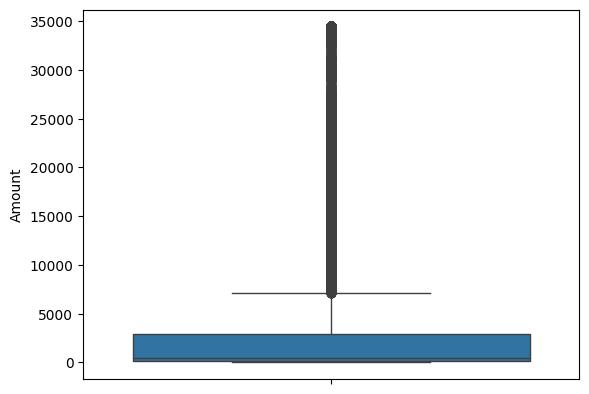

In [10]:
sns.boxplot(new_data['Amount'])

#### IQR METHOD

In [11]:
#IQR
q1=data['Amount'].quantile(0.25)
q3=data['Amount'].quantile(0.75)
iqr=q3-q1
q1,q3,iqr

(100.0, 2921.45, 2821.45)

In [12]:
new_data=data.copy()
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
upper_limit,lower_limit

(7153.624999999999, -4132.174999999999)

<Axes: ylabel='Amount'>

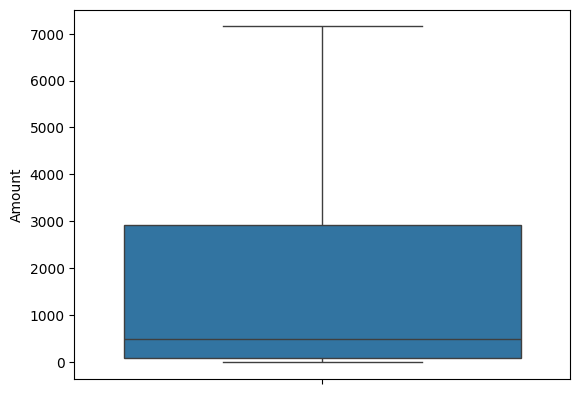

In [38]:
new_data.loc[(new_data['Amount']>upper_limit,'Amount')]=upper_limit
new_data.loc[(new_data['Amount']<lower_limit,'Amount')]=lower_limit
sns.boxplot(new_data['Amount'])

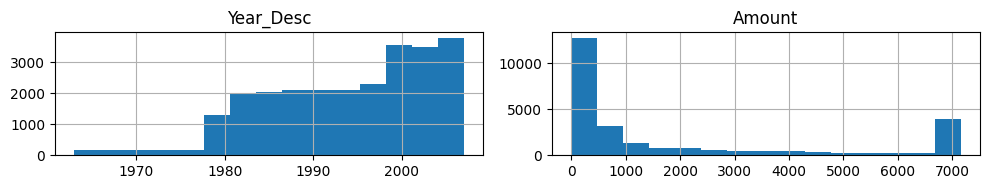

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
new_data[numerical_cols].hist(bins=15,figsize=(10,5),layout=(3,2))
plt.tight_layout()
plt.show()


<Axes: xlabel='Amount', ylabel='Count'>

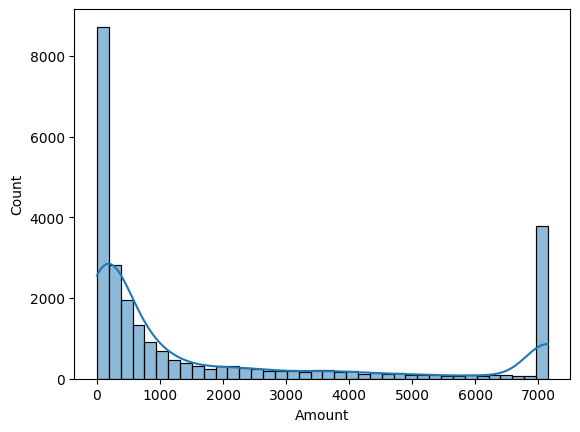

In [26]:
sns.histplot(data=new_data,x=new_data.Amount,kde=True)

In [27]:
print(new_data['Amount'].mean())
print(new_data['Amount'].median())

1905.7267601022113
494.0


In [28]:
new_data['Amount'].skew()

1.2314573070049606

In [29]:
kurtosis(new_data['Amount'],fisher=False)

2.8850927858799276

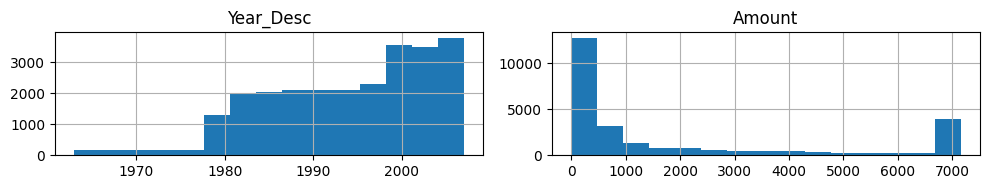

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
new_data[numerical_cols].hist(bins=15,figsize=(10,5),layout=(3,2))
plt.tight_layout()
plt.show()

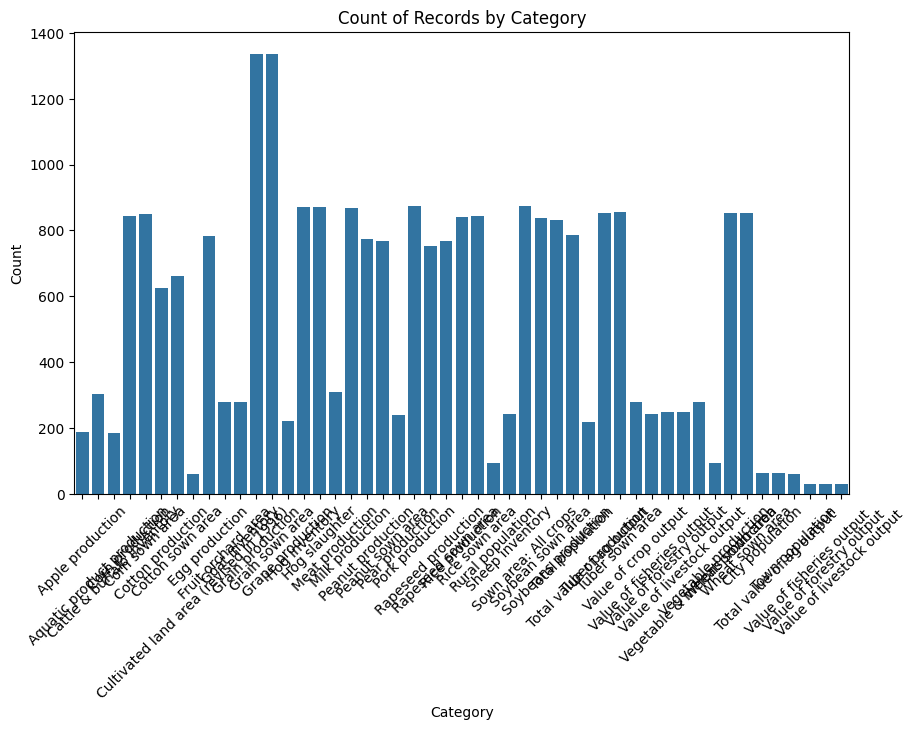

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Assuming you want to count the occurrences of a categorical column, e.g., 'Province'
plt.figure(figsize=(10,6))
sns.countplot(x='Category', data=new_data)

plt.title('Count of Records by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


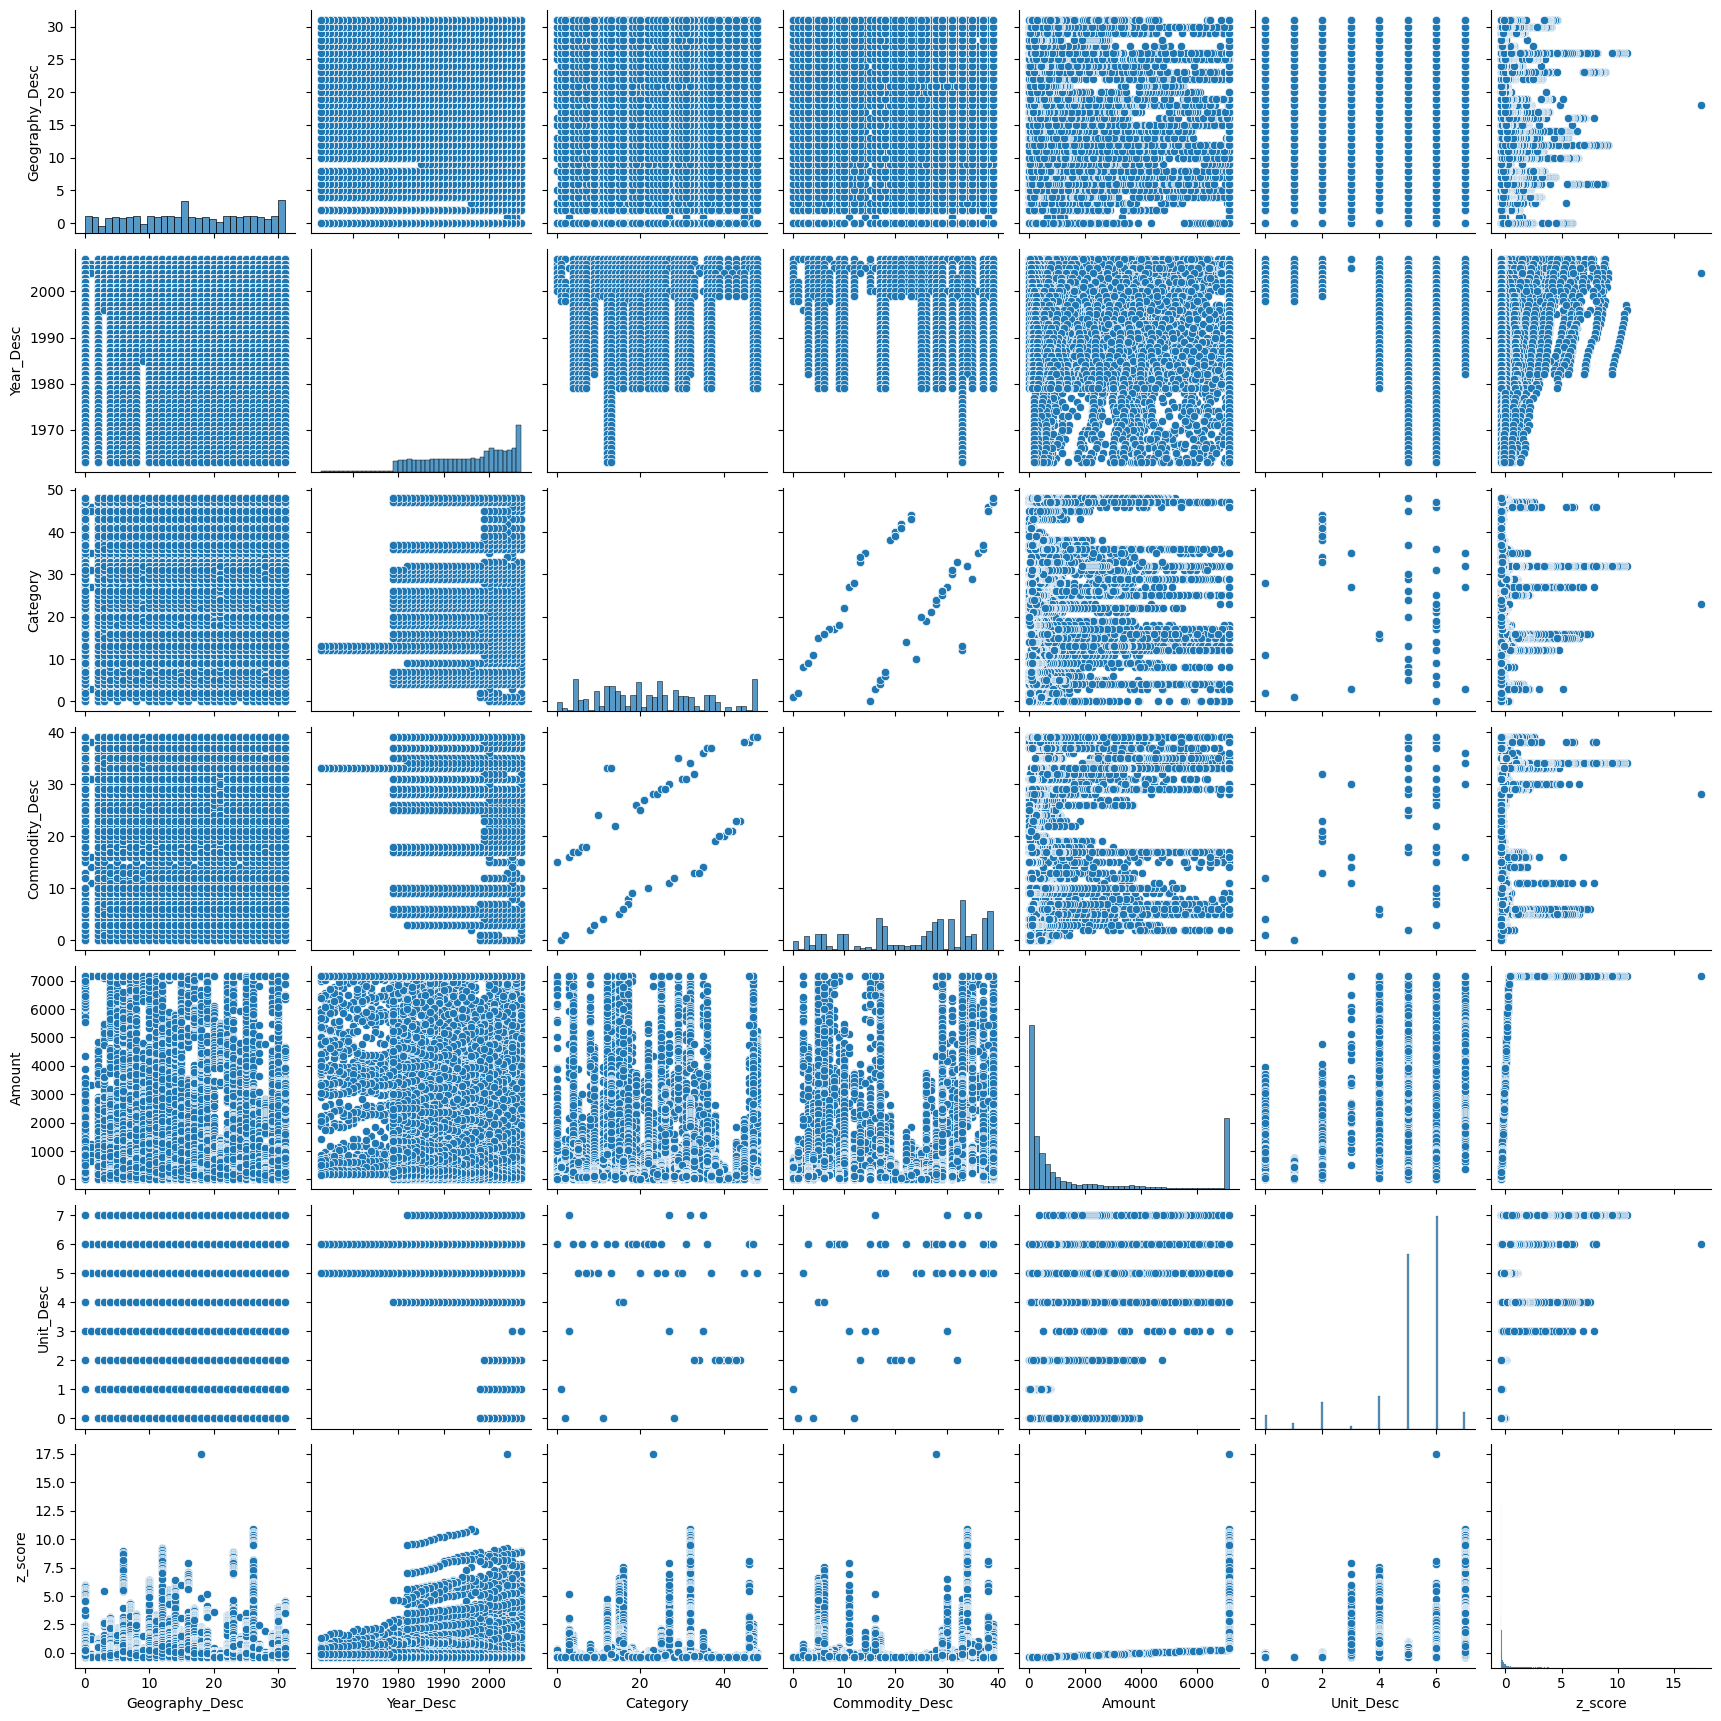

In [36]:
# Pairplot to visualize relationships between all numerical features
sns.pairplot(new_data)
plt.show()

## Categorical encoding

In [13]:
# Select columns with data type 'object' (typically used for categorical data)
categorical_cols = new_data.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)


Categorical columns: Index(['Geography_Desc', 'Category', 'Commodity_Desc', 'Unit_Desc'], dtype='object')


In [16]:

data_encoded = pd.get_dummies(data=new_data, drop_first=True)  # Converts categorical columns to numerical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
new_data['Category'] = le.fit_transform(new_data['Category'])  
new_data['Geography_Desc']=le.fit_transform(new_data['Geography_Desc'])
new_data['Commodity_Desc']=le.fit_transform(new_data['Commodity_Desc'])
new_data['Unit_Desc']=le.fit_transform(new_data['Unit_Desc'])

In [17]:
data_encoded

,Geography_Desc,Year_Desc,Category,Commodity_Desc,Amount,Unit_Desc,z_score
0,0,2007,0,15,403.600000,6,-0.359719
1,0,2007,1,0,166.500000,1,-0.383090
2,0,2007,2,1,143.000000,0,-0.385406
3,0,2007,4,17,2500.000000,6,-0.153079
4,0,2007,5,17,710.400000,5,-0.329478
...,...,...,...,...,...,...,...
25698,31,1965,13,33,2976.000000,5,-0.106160
25699,31,1964,12,33,8705.000000,6,0.458542
25700,31,1964,13,33,3012.600000,5,-0.102552
25701,31,1963,12,33,8170.000000,6,0.405807


In [18]:
numerical_cols = data_encoded.select_dtypes(include=['float64', 'int64']).columns
print("Numerical columns:", numerical_cols)

Numerical columns: Index(['Year_Desc', 'Amount', 'z_score'], dtype='object')


## Feature scaling

In [42]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standardize numerical features
scaler = StandardScaler()
numerical_cols = ['Year_Desc', 'Amount'] 
data_encoded[numerical_cols] = scaler.fit_transform(new_data[numerical_cols])
print(data_encoded.head())



   Geography_Desc  Year_Desc  Category  Commodity_Desc    Amount  Unit_Desc  \
0               0   1.345345         0              15 -0.582267          6   
1               0   1.345345         1               0 -0.674173          1   
2               0   1.345345         2               1 -0.683282          0   
3               0   1.345345         4              17  0.230357          6   
4               0   1.345345         5              17 -0.463342          5   

    z_score  
0 -0.359719  
1 -0.383090  
2 -0.385406  
3 -0.153079  
4 -0.329478  


## Feature Selection

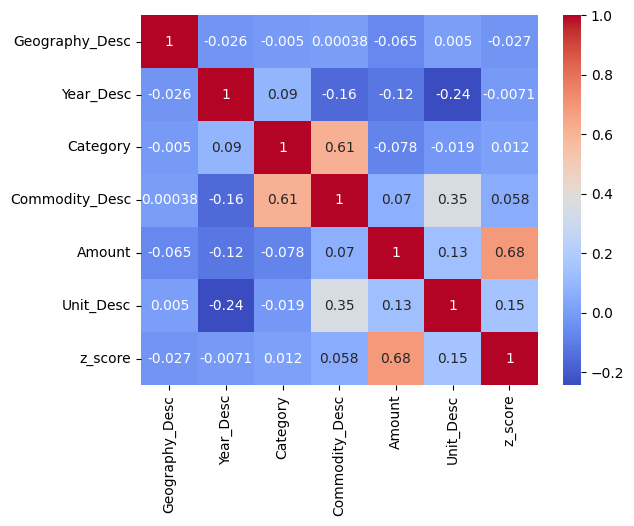

In [43]:
# Correlation Matrix for feature selection
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = new_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# You can drop less correlated features or use techniques like PCA


## Splitting data

In [19]:
# Split into features and target variable
X = data_encoded.drop('Amount', axis=1)  
y = data_encoded['Amount']



#### Train test splitting

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Linear Regression

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Linear Regression MSE: {mse}")
print(f"Linear Regression R-squared: {r2}")


Linear Regression MSE: 0.5088884196674784
Linear Regression R-squared: 0.49289427428797883


## Random forest Regression

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest MSE: {mse_rf}")
print(f"Random Forest R-squared: {r2_rf}")


Random Forest MSE: 6.285473482322464e-08
Random Forest R-squared: 0.9999999373654525


In [48]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   9.6s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   9.6s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   9.6s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   9.6s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   9.5s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=  19.2s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=  19.2s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=  19.2s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=  18.8s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=  18.3s
[CV] END max_depth=10, min_samples_split=2, n_estimators=300; total time=  27.9s
[CV] END max_depth=10, min_samples_split=2, n_e

## SVR

In [21]:
from sklearn.svm import SVR
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_model.fit(X_train, y_train)



SVR(C=100, gamma=0.1)

In [24]:
# Make predictions on the test set
y_pred = svr_model.predict(X_test)

# Evaluate the model using Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"SVR Mean Squared Error: {mse}")
print(f"SVR R-squared: {r2}")

SVR Mean Squared Error: 105905850.59600903
SVR R-squared: 0.0026349809227115273


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for SVR
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1e-3, 1e-2, 0.1, 0.5],
    'epsilon': [0.01, 0.1, 0.2]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=SVR(kernel='rbf'), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END ...................C=0.1, epsilon=0.01, gamma=0.001; total time=  41.5s
[CV] END ...................C=0.1, epsilon=0.01, gamma=0.001; total time=  41.5s
[CV] END ...................C=0.1, epsilon=0.01, gamma=0.001; total time=  40.9s
[CV] END ...................C=0.1, epsilon=0.01, gamma=0.001; total time=  41.3s
[CV] END ...................C=0.1, epsilon=0.01, gamma=0.001; total time=  41.3s
[CV] END ....................C=0.1, epsilon=0.01, gamma=0.01; total time=  40.8s
[CV] END ....................C=0.1, epsilon=0.01, gamma=0.01; total time=  41.2s
[CV] END ....................C=0.1, epsilon=0.01, gamma=0.01; total time=  41.1s
[CV] END ....................C=0.1, epsilon=0.01, gamma=0.01; total time=  40.7s
[CV] END ....................C=0.1, epsilon=0.01, gamma=0.01; total time=  41.1s
[CV] END .....................C=0.1, epsilon=0.01, gamma=0.1; total time=  53.3s
[CV] END .....................C=0.1, epsilon=0.

## MLP

In [25]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
mlp_reg = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=500, random_state=42)
mlp_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = mlp_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MLPRegressor Mean Squared Error: {mse}")
print(f"MLPRegressor R-squared: {r2}")

MLPRegressor Mean Squared Error: 7335.533694375926
MLPRegressor R-squared: 0.9999309178420092


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'lbfgs', 'sgd']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(MLPRegressor(max_iter=500), param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best Parameters:", grid_search.best_params_)


In [26]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Gradient Boosting Mean Squared Error: {mse}")
print(f"Gradient Boosting R-squared: {r2}")

Gradient Boosting Mean Squared Error: 7764.939115791397
Gradient Boosting R-squared: 0.9999268739299503


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best Parameters:", grid_search.best_params_)


In [27]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the AdaBoost Regressor model
ada_model = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3), n_estimators=100, learning_rate=0.1, random_state=42)
ada_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ada = ada_model.predict(X_test)

# Evaluate the model
mse_ada = mean_squared_error(y_test, y_pred_ada)
r2_ada = r2_score(y_test, y_pred_ada)
print(f"AdaBoost Mean Squared Error: {mse_ada}")
print(f"AdaBoost R-squared: {r2_ada}")


AdaBoost Mean Squared Error: 1093807.9581827286
AdaBoost R-squared: 0.9896990979351907


In [ ]:
# Define the parameter grid for AdaBoost
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'base_estimator__max_depth': [1, 2, 3],
}

# Perform Grid Search with cross-validation
grid_search_ada = GridSearchCV(AdaBoostRegressor(estimator=DecisionTreeRegressor()), param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search_ada.fit(X_train, y_train)

# Get the best parameters
print("Best Parameters for AdaBoost:", grid_search_ada.best_params_)


In [28]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the AdaBoost Regressor model
model = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3), n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)


AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.1, n_estimators=100, random_state=42)

In [29]:
from sklearn.model_selection import train_test_split

# Assuming X is your feature set and y is the target variable
# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Make predictions using the test features (X_test)
y_pred = model.predict(X_test)

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np



# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# R-squared (R²) Score
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²) Score: {r2}")

Mean Absolute Error (MAE): 890.565370357568
Mean Squared Error (MSE): 1093807.9581827286
Root Mean Squared Error (RMSE): 1045.8527421117797
R-squared (R²) Score: 0.9896990979351907
